In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("../raw-dataset/feature-extracted.csv")

df = df.drop(["Unnamed: 0"], axis=1)

df.head()

,class,length,nb_hyphen,nb_subdomains,nb_digits,nb_www,nb_adword,len_subomain,nb_digits_subdomain,nb_cdn
0,0,10,0,0,0,0,0,0,0,0
1,0,11,0,0,0,0,0,0,0,0
2,0,9,0,0,0,0,0,0,0,0
3,0,9,0,0,0,0,0,0,0,0
4,0,10,0,0,0,0,0,0,0,0


In [6]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

names = df.columns

d = scaler.fit_transform(df)

df = pd.DataFrame(d, columns=names)

In [7]:
df

,class,length,nb_hyphen,nb_subdomains,nb_digits,nb_www,nb_adword,len_subomain,nb_digits_subdomain,nb_cdn
0,0.0,0.077922,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.090909,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.064935,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.064935,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.077922,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
627909,1.0,0.051948,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
627910,1.0,0.311688,0.1,0.142857,0.0,0.0,0.0,0.190476,0.0,0.0
627911,1.0,0.116883,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
627912,1.0,0.090909,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [8]:
def plot_graph(columns):
    
    graph_data = {}
    
    for column in columns:
        graph_data[column] = [adservices[column].mean() , non_adservice[column].mean()]

    adservices_count = [graph_data[x][0] for x in graph_data]
    non_adservice_count = [graph_data[x][1] for x in graph_data]
    
    x = np.arange(len(columns)) 
    width = 0.35 

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, adservices_count, width, label='Phishing')
    rects2 = ax.bar(x + width/2, non_adservice_count, width, label='Legitimate')

    ax.set_ylabel('Count')
    ax.set_title('Features in dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(columns)
    ax.legend()

    fig.set_size_inches(18.5, 10.5)
    fig.tight_layout()
    plt.show()   

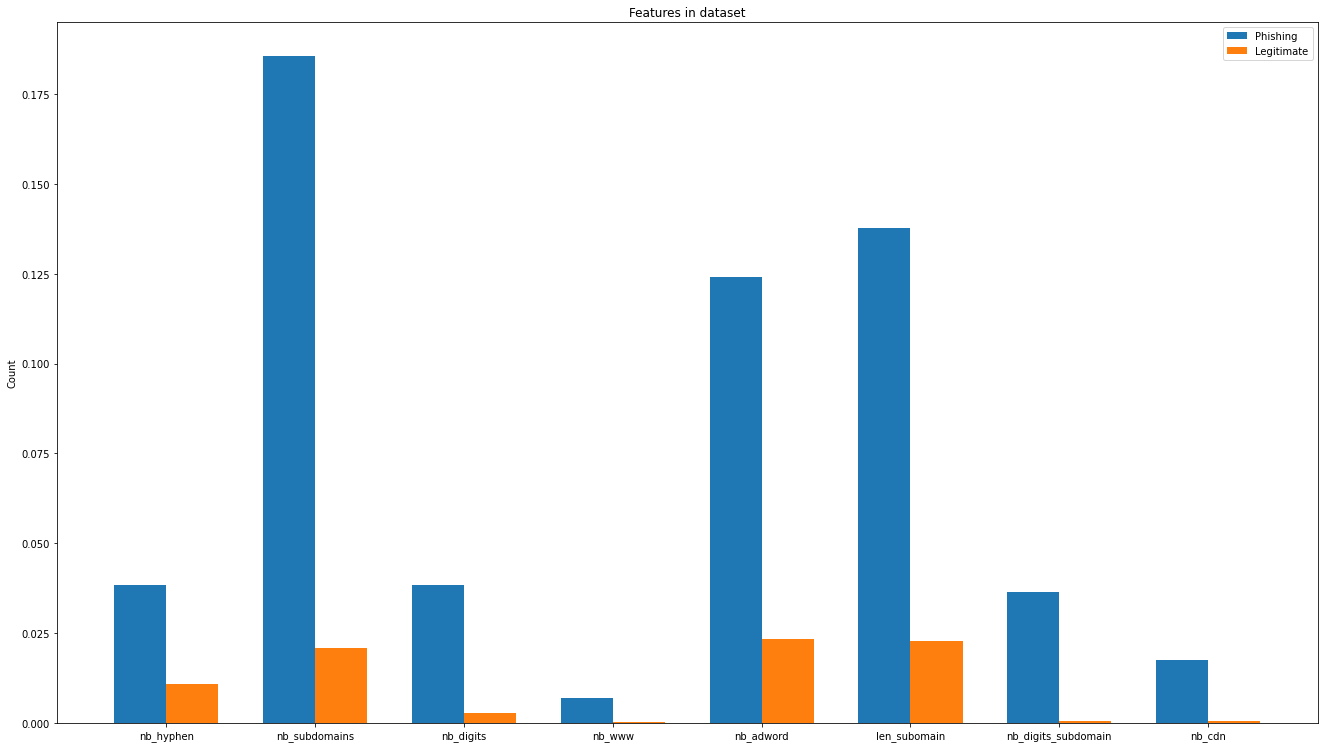

In [9]:
adservices = df[df['class'] == 1]
non_adservice = df[df['class'] == 0]

plot_graph(df.columns[2:])

In [10]:
df.to_csv("../processed-datasets/final-dataset.csv", index=False)